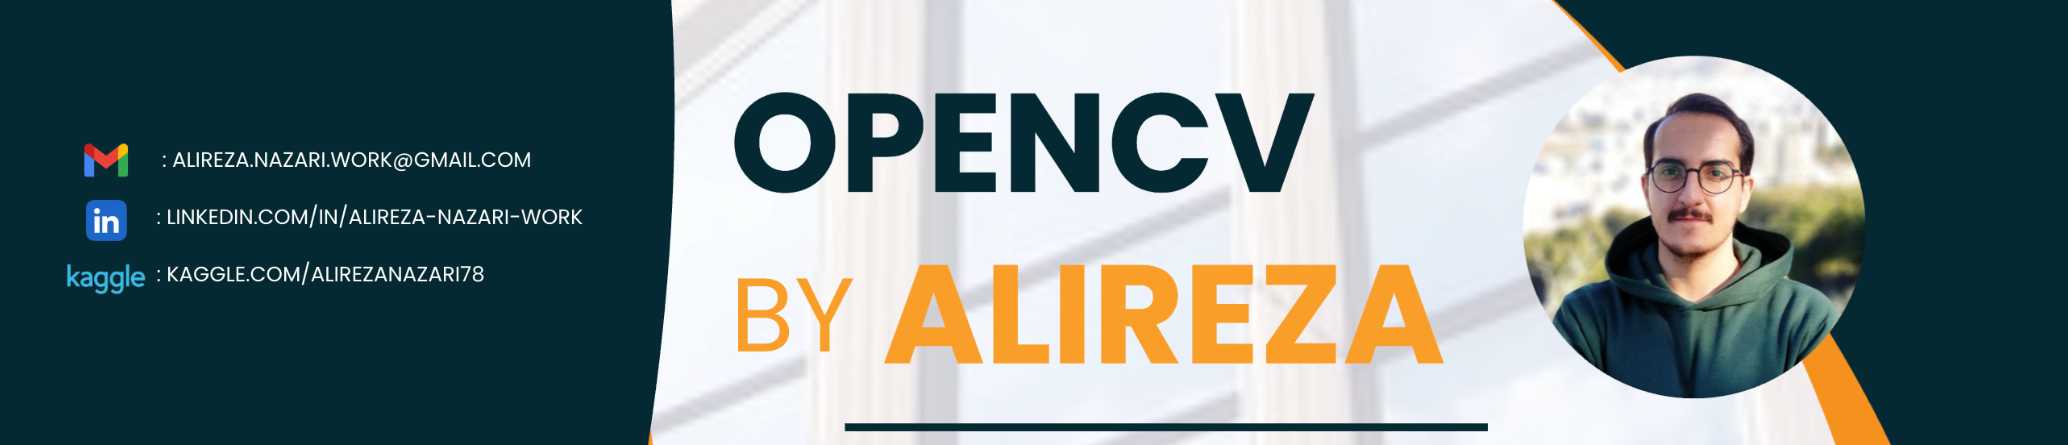

## 50 - face and eye detection

**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### HAAR Cascade Classifiers


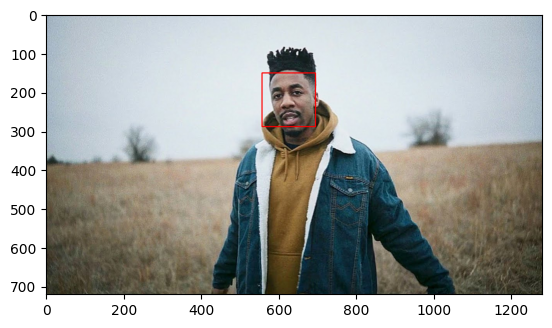

In [2]:

# Load Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image_path = "/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/man2.jpg"  
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Check if image was loaded
if image is None:
    print("Image not found or unable to load.")
    exit()

# Convert to grayscale

# Detect faces
faces = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show the result
plt.imshow( image)



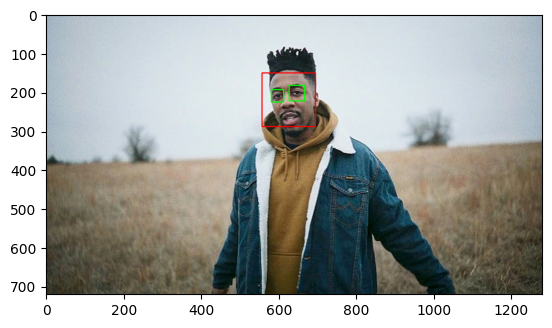

In [3]:
import cv2

# Load Haar cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Read the image
image_path = "/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/man2.jpg"  
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
if image is None:
    print("Image not found or unable to load.")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    # Draw face rectangle
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Region of interest for eyes (only search inside the face)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Detect eyes in the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Show the result
plt.imshow(image)



### Source :

https://www.geeksforgeeks.org/python/opencv-python-tutorial/